# Funciones Radiales del Hidrógeno

Darío Mitnik


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Cosas útiles para utilizar luego
from sympy import oo
from sympy.plotting import plot
from __future__ import division 

# Estética
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.

r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)
k=sp.Symbol('k',positive=True)
N=sp.Symbol('N',positive=True)

In [3]:
# Función Radial Hidrogénica (con hipergeométricas)

def R_hyp(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
    R = rnorm * rfunc
    return R


In [4]:
# Orbitales de Slater

def slater(N,z,r):
    sl1 = 2*z**(N+1/2)
    sl2 = sp.sqrt(sp.factorial(2*N))
    sl3 = r**(N-1)*sp.exp(-z*r)
    return sl1*sl3/sl2

In [48]:
# Definición de los vectores para plotear

nsize=500
xmax=10.0
xmin=0.
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize)
psi2 = np.zeros(nsize)

In [49]:
# Copiamos el array simbólico a numérico

for i in range(nsize):
    psi[i] = R_hyp(1,0,1,x[i]) # n=1; l=0; z=1
    psi2[i] = R_hyp(2,0,1,x[i]) # n=2; l=0; z=1

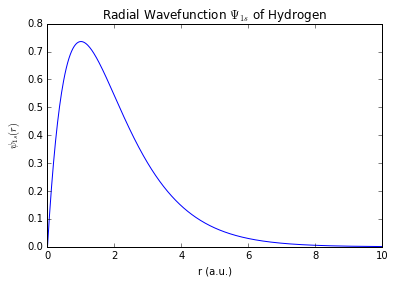

In [50]:
# Ploteo

plt.plot(x,x*psi);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");

In [8]:
# Integral simbólica

sp.integrate( (r * R_hyp(1,0,1,r))**2, (r,0,oo))

                2
     ┌─  ⎛0 │  ⎞ 
1.0⋅ ├─  ⎜  │ 0⎟ 
    1╵ 1 ⎝2 │  ⎠ 

In [9]:
# Chequear que esta normalizada
sp.integrate((r * R_hyp(1,0,1,r))**2, (r,0,oo)).evalf()

In [10]:
#Valor medio del fundamental
# <r>

sp.integrate(r * (r * R_hyp(1,0,1,r))**2, (r,0,oo))

                2
     ┌─  ⎛0 │  ⎞ 
1.5⋅ ├─  ⎜  │ 0⎟ 
    1╵ 1 ⎝2 │  ⎠ 

In [11]:
# Evaluada
sp.integrate(r * (r * R_hyp(1,0,1,r))**2, (r,0,oo)).evalf()

In [12]:
#Valor medio del fundamental
# <1/r>

sp.integrate(r**(-1.) * (r * R_hyp(1,0,1,r))**2, (r,0,oo))

                2
     ┌─  ⎛0 │  ⎞ 
1.0⋅ ├─  ⎜  │ 0⎟ 
    1╵ 1 ⎝2 │  ⎠ 

In [13]:
#Valor medio del fundamental
# <r**2>

print(sp.integrate(r**2 * (r * R_hyp(1,0,1,r))**2, (r,0,oo)))
print(sp.integrate(r**2 * (r * R_hyp(1,0,1,r))**2, (r,0,oo)).evalf())

3.0*hyper((0,), (2,), 0)**2
3.00000000000000


## Solucion de ec de Schrödinger

In [13]:
# Chequear que es solucion de la ec de Schrödinger

n_schro = 3
l_schro = 0
z_schro = 6

sp_Psi = r*R_hyp(n_schro,l_schro,z_schro,r) # La funcion de onda Radial reducida para 1s
schrodinger = -(1/2)*sp.diff(sp_Psi,r,r)-(z_schro/r)*sp_Psi
energia_psi = -(1/2)*(z_schro**2/n_schro**2)*sp_Psi

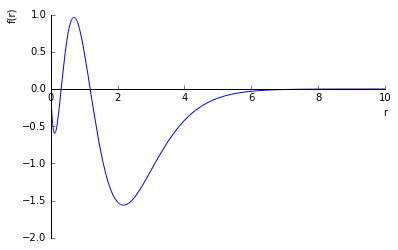

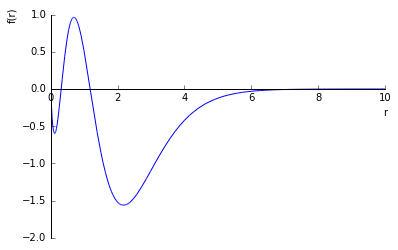

In [14]:
# Plotear ambas funciones
# Uso el plotter de sympy para no tener que samplear las funciones

plot(schrodinger, (r,0,10),color='red')
plot(energia_psi,(r,0,10),color='blue')

## Condicion de Kato

In [6]:
# Condicion de Kato

orb_slater = slater(1,3,r)
kato_num = sp.diff(orb_slater, r)
kato_den = orb_slater
kato = kato_num/kato_den
kato

## Condicion de Oppenheimer

In [17]:
# Condicion de Oppenheimer

opp = (1/sp.sqrt(4*sp.pi))*R_hyp(2,0,1,r)
opp.subs(r,0)**2

                   2
       ┌─  ⎛-1 │  ⎞ 
0.125⋅ ├─  ⎜   │ 0⎟ 
      1╵ 1 ⎝2  │  ⎠ 
────────────────────
         π          

# Ejercicios:

* Generar otras funciones de onda
* Chequear ortonormalidad
* Calcular los valores medio $\langle r \rangle$, $\langle r^2 \rangle$, 
  $\langle \frac{1}{r} \rangle$ 


## Funcion radial del estado 2s

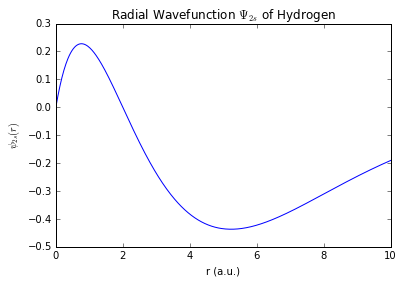

In [19]:
# Plot de psi2 (2s) n=2;l=0

plt.plot(x,x*psi2);
plt.title("Radial Wavefunction $\Psi_{2s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{2s}(r)$");

In [20]:
# Integral simbólica

sp.integrate( (r * R_hyp(2,0,1,r))**2, (r,0,oo))

                 2                                                    2
     ┌─  ⎛-1 │  ⎞         ┌─  ⎛-1 │  ⎞  ┌─  ⎛0 │  ⎞        ┌─  ⎛0 │  ⎞ 
1.0⋅ ├─  ⎜   │ 0⎟  - 3.0⋅ ├─  ⎜   │ 0⎟⋅ ├─  ⎜  │ 0⎟ + 3.0⋅ ├─  ⎜  │ 0⎟ 
    1╵ 1 ⎝2  │  ⎠        1╵ 1 ⎝2  │  ⎠ 1╵ 1 ⎝3 │  ⎠       1╵ 1 ⎝3 │  ⎠ 

### Chequeo normalizacion

In [21]:
# Chequear que esta normalizada
sp.integrate( (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

### Chequeo ortogonalidad con el estado 1s y 2p

In [24]:
# Chequeo ortogonalidad entre 1s y 2s

sp.integrate(r*R_hyp(1,0,1,r)*r*R_hyp(2,0,1,r), (r,0,oo)).evalf()

In [25]:
# Chequeo ortogonalidad entre 1s y 2p

sp.integrate(r*R_hyp(1,0,1,r)*r*R_hyp(2,1,1,r), (r,0,oo)).evalf()

### Valores medios

In [38]:
# <r>
# Deberia dar:
def VM_r(n, l, z):
    return ((n*n)/(2*z)) * (3 - (1/n**2) * l*(l+1))

VM_r(2,0,1)

In [36]:
# Integrando:
sp.integrate(r * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

In [39]:
# <r**2>
# Deberia dar:
def VM_r2(n, l, z):
    return ((n**4)/(2*z**2)) * (5 + (1/n**2) - (3/n**2)*l*(l+1))

VM_r2(2,0,1)

In [40]:
# <r**2>

sp.integrate(r**2 * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

In [41]:
# <r**-3>

sp.integrate((1/r**3) * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

In [42]:
# <r**-2>

sp.integrate((1/r**2) * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

In [43]:
# <r**-1>

sp.integrate((1/r) * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

In [44]:
# <r**0> Es el de chequear que este normalizada y da 1

sp.integrate((r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

### Teorema del Virial

In [ ]:
e_kin = 
e_pot = 1/4 # Z**2/n**2

# Otra forma de hacerlo (con numpy)

In [30]:
from scipy import integrate
from scipy.special import hyp1f1
from math import factorial


In [31]:
def R1F1(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * factorial(n+l)
    rden = (factorial(2*l+1))**2 * 2*n * factorial(n-l-1)
    rnorm = np.sqrt(rnum/rden)
    rfunc = (rho)**l * np.exp(-rho/2) * hyp1f1(-n+l+1,2*l+2,rho)
    R = rnorm * rfunc
    return R 

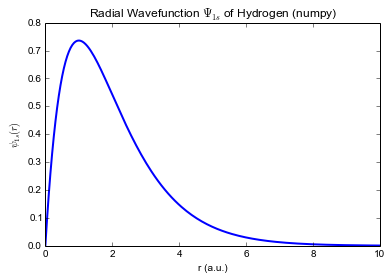

In [32]:
r = np.linspace(0,10,200);
plt.plot(r,r*R1F1(1,0,1,r),'-',label='R1F1',linewidth=2);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen (numpy)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");


In [33]:
# Integral

rR2=lambda r:(R1F1(1,0,1,r) * r)**2 
Integral=integrate.quad(rR2,0,float('inf'))
print(Integral)

(1.0000000000000002, 1.3633023322217214e-10)
